# Boston Housing

# Data 

* X_train (404, 13)
* Y_train (404,)

* X_test (102, 13)
* Y_test (102,)


# Model
* Using Keras - 3 layer Model (Dense 64,Dense 64, Dense 1)


The dataset contains 13 different features:

1. Per capita crime rate.
2. The proportion of residential land zoned for lots over 25,000 square feet.
3. The proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. The average number of rooms per dwelling.
7. The proportion of owner-occupied units built before 1940.
8. Weighted distances to five Boston employment centers.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. Percentage lower status of the population.


In [1]:
import warnings
warnings.filterwarnings('ignore')

from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt

print(tf.__version__)

1.8.0


### Loading the data

In [3]:
boston_housing = keras.datasets.boston_housing

(X_train, Y_train), (X_test, Y_test) = boston_housing.load_data()

### Preprocessing

In [4]:
order = np.argsort(np.random.random(Y_train.shape))
X_train = X_train[order]
Y_train =  Y_train[order]

X_train, X_test = X_train.T, X_test.T
Y_train = Y_train.reshape((1,Y_train.shape[0]))
Y_test = Y_test.reshape((1,Y_test.shape[0]))

In [5]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(13, 404)
(1, 404)
(13, 102)
(1, 102)


### Model

In [6]:
learning_rate = 0.01
training_epochs = 2000
batch_size = 100
display_step = 50
tf.reset_default_graph()

In [7]:
X = tf.placeholder(tf.float32, [13, None]) 
Y = tf.placeholder(tf.float32, [1, None])

In [8]:
# Set model weights
W1 = tf.get_variable("W1", [25, 13], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
W3 = tf.get_variable("W3", [1, 12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())

In [9]:
# Build Model
Z1 = tf.add(tf.matmul(W1,X), b1)                                              # Z1 = np.dot(W1, X) + b1
A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
Z2 = tf.add(tf.matmul(W2,A1), b2)                                              # Z2 = np.dot(W2, a1) + b2
A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
Z3 = tf.add(tf.matmul(W3,A2), b3)

In [10]:
#Cost
cost = tf.losses.mean_squared_error(Y, Z3)
# loss = tf.reduce_mean(tf.square(Y - Z3))

In [11]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [12]:
init = tf.global_variables_initializer()

costs = [[],[]]

with tf.Session() as sess:
    sess.run(init)
   
    # Training cycle
    for epoch in range(training_epochs):
        _, c = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})
        if (epoch+1) % 10 == 0:    
            costs[0].append(c)
            costs[1].append(cost.eval(feed_dict={X: X_test, Y: Y_test}))
        
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    predictions = Z3.eval(feed_dict={X: X_test, Y: Y_test})

Epoch: 0050 cost= 115.621482849
Epoch: 0100 cost= 80.833084106
Epoch: 0150 cost= 62.478485107
Epoch: 0200 cost= 44.384769440
Epoch: 0250 cost= 45.466800690
Epoch: 0300 cost= 49.102741241
Epoch: 0350 cost= 46.935546875
Epoch: 0400 cost= 37.527347565
Epoch: 0450 cost= 37.715045929
Epoch: 0500 cost= 34.524021149
Epoch: 0550 cost= 35.058895111
Epoch: 0600 cost= 26.883367538
Epoch: 0650 cost= 23.964462280
Epoch: 0700 cost= 28.229322433
Epoch: 0750 cost= 25.000467300
Epoch: 0800 cost= 29.699199677
Epoch: 0850 cost= 21.318496704
Epoch: 0900 cost= 17.225809097
Epoch: 0950 cost= 23.282089233
Epoch: 1000 cost= 13.874781609
Epoch: 1050 cost= 15.865134239
Epoch: 1100 cost= 23.331956863
Epoch: 1150 cost= 25.613853455
Epoch: 1200 cost= 20.034837723
Epoch: 1250 cost= 20.344181061
Epoch: 1300 cost= 13.973696709
Epoch: 1350 cost= 28.268762589
Epoch: 1400 cost= 12.656247139
Epoch: 1450 cost= 18.237348557
Epoch: 1500 cost= 19.573741913
Epoch: 1550 cost= 17.472633362
Epoch: 1600 cost= 14.969802856
Epoch: 

In [13]:
predictions

array([[10.042008 , 16.703203 , 20.172472 , 35.20808  , 21.591108 ,
        19.645277 , 24.59444  , 21.455212 , 15.979005 , 17.76287  ,
        10.979327 , 15.419694 , 14.992563 , 34.022194 , 15.678891 ,
        18.921406 , 20.263908 , 19.966587 , 16.947796 , 19.197721 ,
        12.055613 , 12.149361 , 18.189768 , 15.45172  , 20.88364  ,
        19.22903  , 22.071987 , 33.002323 , 10.952857 , 20.461008 ,
        18.897615 , 10.98412  , 28.978054 , 19.031088 , 16.255613 ,
        10.3289995, 12.830905 , 13.063823 , 15.938376 , 24.113174 ,
        23.39223  , 20.226494 , 13.382022 , 24.842255 , 36.30192  ,
        21.425755 , 27.099743 , 17.65407  , 18.962767 , 19.327162 ,
        32.427727 , 18.439209 , 11.397458 , 15.567542 , 25.778143 ,
        22.6796   , 10.846289 , 28.033052 , 31.388792 , 20.178612 ,
        19.621494 , 14.08572  , 12.134229 , 18.597942 , 21.596272 ,
        22.47492  , 14.848931 , 23.00658  , 18.572502 ,  8.196309 ,
        18.538822 , 23.185083 , 17.908081 , 18.8

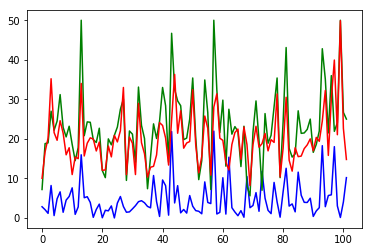

In [14]:
plt.plot(np.abs(Y_test - predictions)[0], color = 'blue')
plt.plot(Y_test[0], color = 'green')
plt.plot(predictions[0], color = 'red')